In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append('C:/Users/Petr.Yurchenko/McKinsey_Severstal_Hack_2022')
from hyperopt import hp
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
import warnings
warnings.filterwarnings("ignore")

from server2022.src.train_val import *
from server2022.src.model_features import *
from server2022.data.processed.prepare_data import *

In [21]:
df = create_df_0years_known()
# df = create_df_1year_known()

In [22]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]

In [16]:
df.head(3)

Наименование ДП  -3, Нематериальные активы, RUB  \
0                0                        0.000384   
1                1                        0.000000   
2                2                        0.000327   

   -2, Нематериальные активы, RUB  -1, Нематериальные активы, RUB  \
0                        0.000708                        0.000908   
1                        0.000004                        0.000003   
2                        0.001460                        0.000872   

   -3, Основные средства , RUB  -2, Основные средства , RUB  \
0                     0.001797                     0.001715   
1                     0.000138                     0.000141   
2                     0.000922                     0.000898   

   -1, Основные средства , RUB  -3, Внеоборотные активы, RUB  \
0                     0.002040                      0.001696   
1                     0.000145                      0.000128   
2                     0.000883                      0.000856   

   -2, Внеоборотные активы, RUB  -1, Внеоборотные активы, RUB  \
0                      0.001654                      0.002146   
1                      0.000132                      0.000135   
2                      0.000911                      0.000896   

   -3, Дебиторская задолженность, RUB  -2, Дебиторская задолженность, RUB  \
0                            0.038519                            0.027035   
1                            0.000600                            0.000343   
2                            0.003025                            0.001704   

   -1, Дебиторская задолженность, RUB  -3, Оборотные активы, RUB  \
0                            0.019405                   0.017364   
1                            0.000873                   0.000501   
2                            0.001273                   0.004331   

   -2, Оборотные активы, RUB  -1, Оборотные активы, RUB  \
0                   0.015713                   0.013702   
1                   0.000506                   0.000657   
2                   0.003968                   0.003585   

   -3, Уставный капитал , RUB  -2, Уставный капитал , RUB  \
0                    0.001246                    0.001246   
1                    0.000003                    0.000003   
2                    0.000039                    0.000039   

   -1, Уставный капитал , RUB  -3, Капитал и резервы, RUB  \
0                    0.001190                    0.152639   
1                    0.000003                    0.150517   
2                    0.000037                    0.152142   

   -2, Капитал и резервы, RUB  -1, Капитал и резервы, RUB  \
0                    0.144771                    0.175340   
1                    0.142515                    0.173869   
2                    0.144242                    0.175406   

   -3, Заёмные средства (долгосрочные), RUB  \
0                              1.839381e-08   
1                              1.839381e-08   
2                              1.839381e-08   

   -2, Заёмные средства (долгосрочные), RUB  \
0                              1.839381e-08   
1                              1.839381e-08   
2                              1.839381e-08   

   -1, Заёмные средства (долгосрочные), RUB  \
0                              1.698913e-08   
1                              1.698913e-08   
2                              1.698913e-08   

   -3, Долгосрочные обязательства, RUB  -2, Долгосрочные обязательства, RUB  \
0                             0.000217                             0.000224   
1                             0.000006                             0.000007   
2                             0.000015                             0.000013   

   -1, Долгосрочные обязательства, RUB  \
0                             0.000215   
1                             0.000005   
2                             0.000003   

   -3, Заёмные средства (краткосрочные), RUB  \
0                                   0.000004   
1                                  

In [6]:
# new_cols = []
# for col in df.columns:
#     for m in ['Основные средства', 
#             'Внеоборотные активы',
#             'Дебиторская задолженность',
#             'Оборотные активы',
#             'Кредиторская задолженность',
#              'Краткосрочные обязательства']:
#         if m in col:
#             new_cols.append(col)

In [7]:
ness_cols = ['Наименование ДП', 'Итого', 'year', 'binary_target'] + \
['Макс. ПДЗ за -1 год, дней',
 'Сред. ПДЗ за -1 год, дней',
 'Кол-во просрочек свыше 5-ти дней за -1 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за -1 год, руб.']

Fitting model <catboost.core.CatBoostClassifier object at 0x000001D28BE57AF0> with treshold = 0.0...


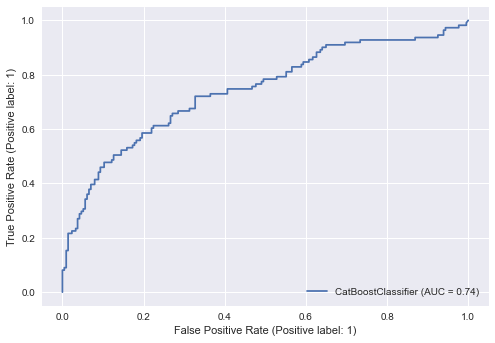

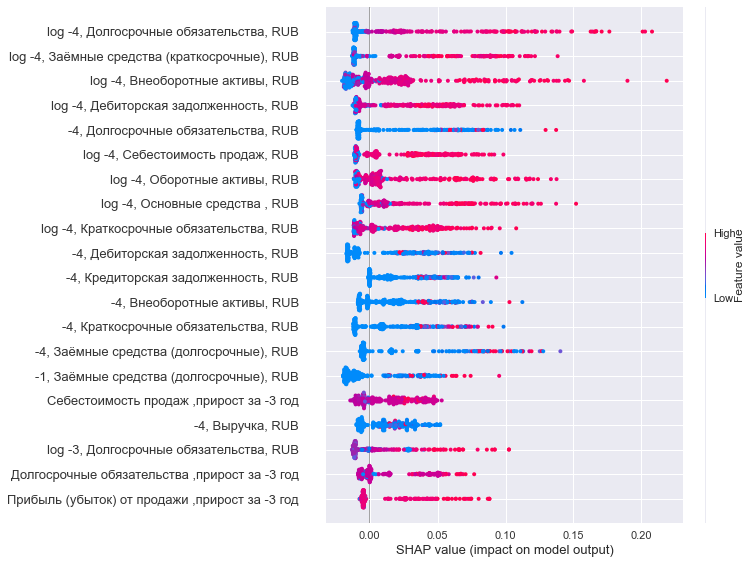

F1 = 0.613, Precision = 0.5333, Recall = 0.7207, Accuracy = 0.6892, ROC_AUC = 0.7421


In [23]:
# {'class_w': 0.002209808913483319, 'learning_rate': 0.33832420007751696}

model = CatBoostClassifier(iterations=500,
                           depth=5, 
                           l2_leaf_reg=5, 
                           learning_rate=0.014,
                           loss_function='Logloss',
                           use_best_model=False,
                           eval_metric='AUC',
                           verbose=False,
                           class_weights=[1, 0.0006], # 0.0006
                           random_seed=RANDOM_STATE,
                          )
# 0.0031846766307608034
# 0.001686030803121878
make_report(model, df, #[[col for col in df.columns if 'log' in col or 'total mean growth' in col] + ness_cols], 
            treshold=0.001686030803121878, to_file=False, file_path='../reports/report_petr.csv', 
            create_new_clients=False, comment=f'0 years, normalize_fin_columns=True')

In [18]:
X_train, X_test, y_train, y_test = data_split(df)
probas = model.predict_proba(X_test)[:, 1]

best = 0
xx = 0
for x in sorted(probas):
    pr = precision_score(y_test, probas >= x)
    rl = recall_score(y_test, probas >= x)
    best_ = f1_score(y_test, probas >= x)
    # best_ = pr * rl
    if best_ >= best:
        best = best_
        xx = x
xx

0.0031846766307608034

In [ ]:
#0.0021761171004827566

Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C226D850> with treshold = 0.5...


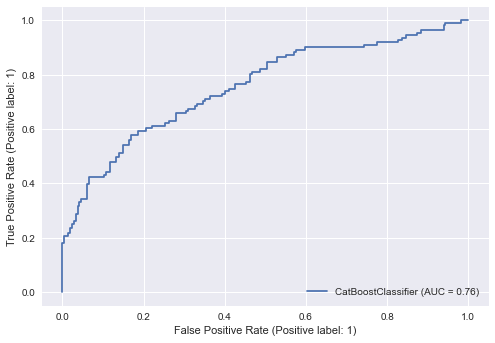

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


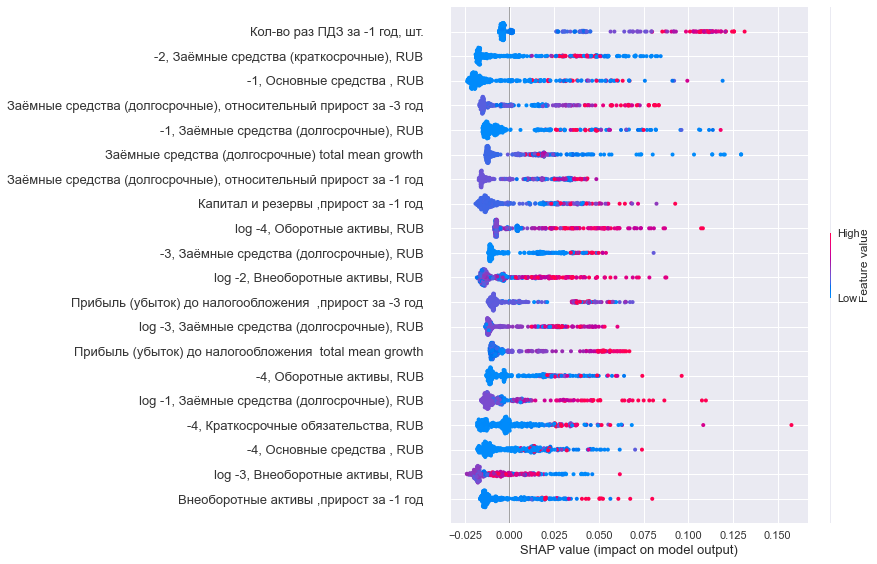

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7553
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C226D850> with treshold = 0.0...


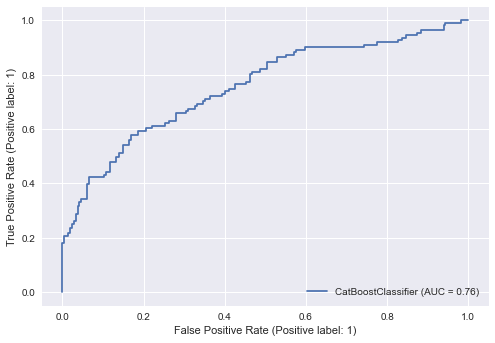

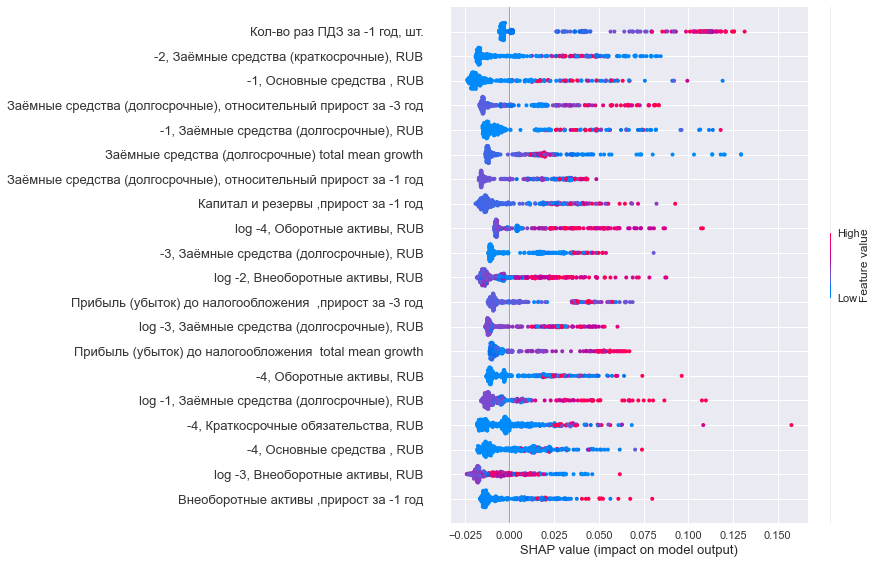

F1 = 0.6083, Precision = 0.6226, Recall = 0.5946, Accuracy = 0.7385, ROC_AUC = 0.7553
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C38C7F40> with treshold = 0.5...


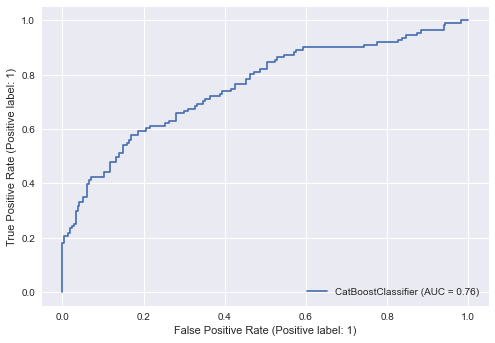

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


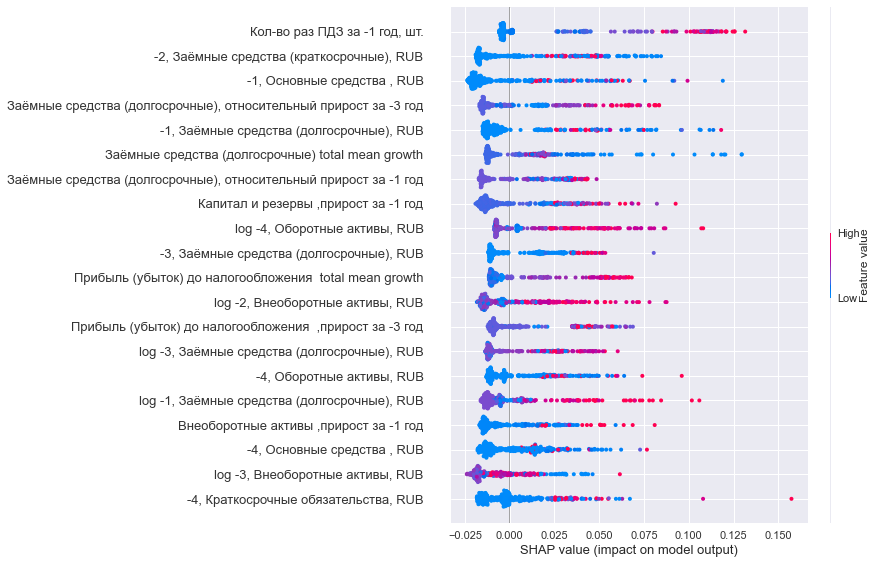

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7557
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C38C7F40> with treshold = 0.0...


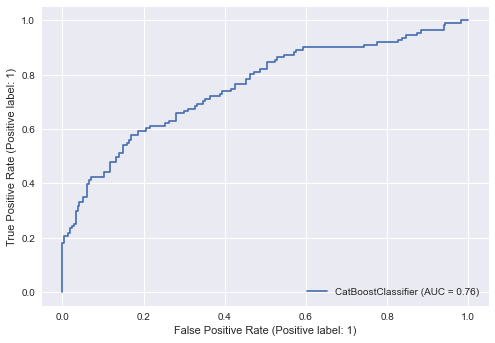

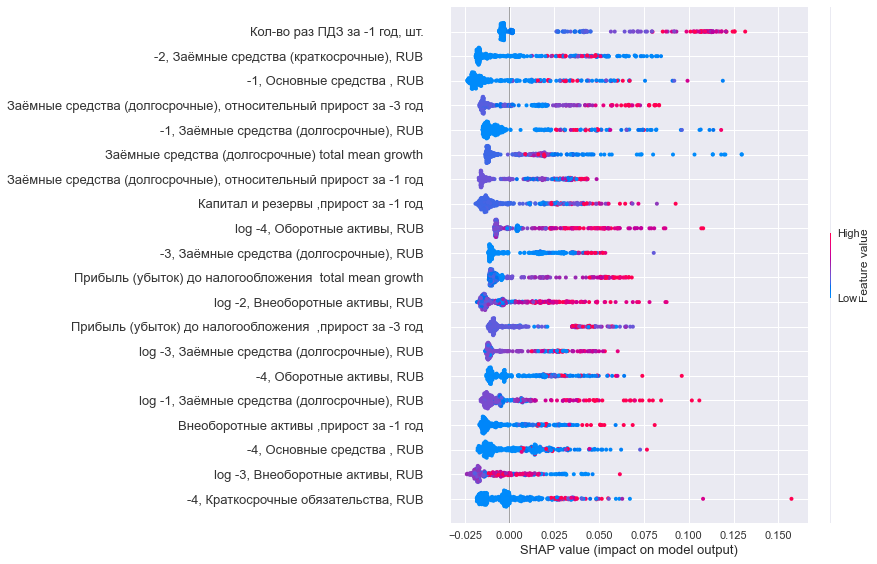

F1 = 0.6083, Precision = 0.6226, Recall = 0.5946, Accuracy = 0.7385, ROC_AUC = 0.7557
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C406DD30> with treshold = 0.5...


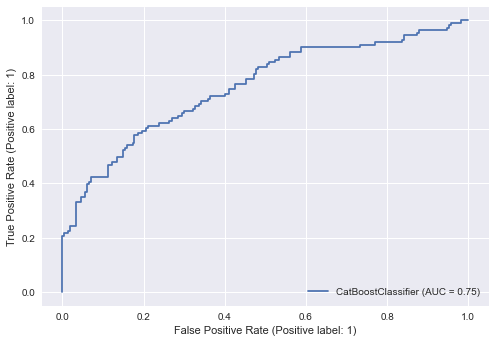

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


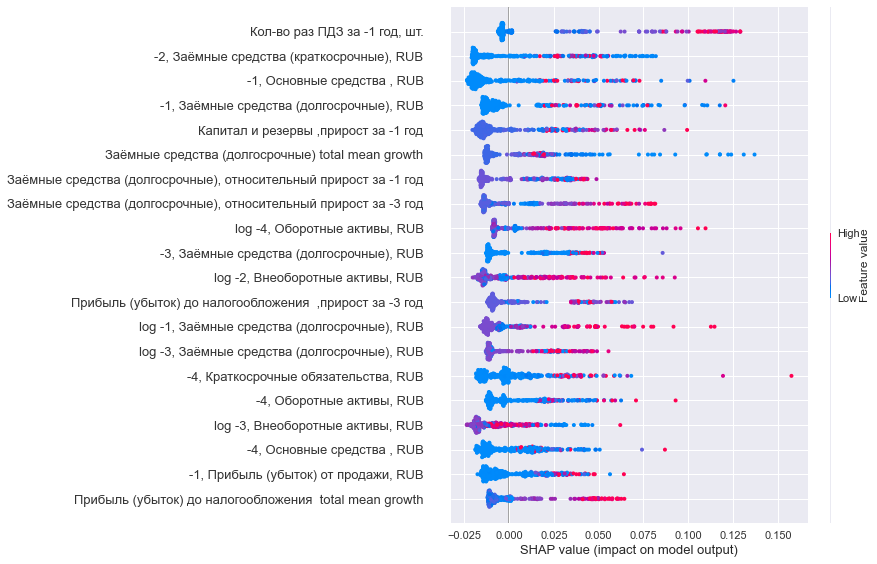

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7546
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C406DD30> with treshold = 0.0...


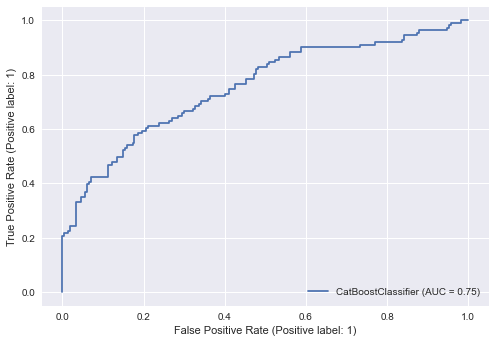

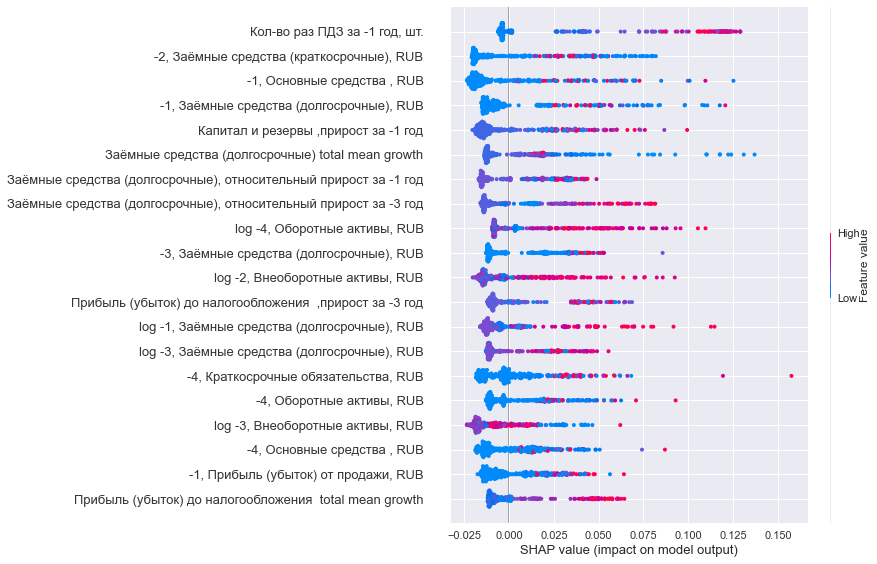

F1 = 0.6071, Precision = 0.6018, Recall = 0.6126, Accuracy = 0.7292, ROC_AUC = 0.7546
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C1BB6FA0> with treshold = 0.5...


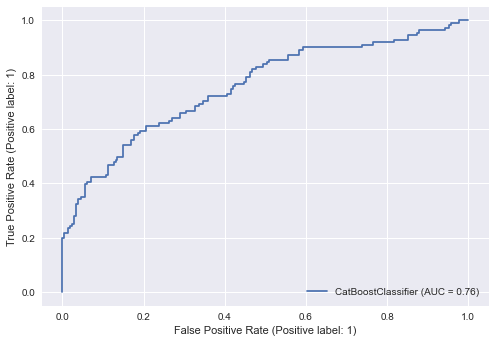

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


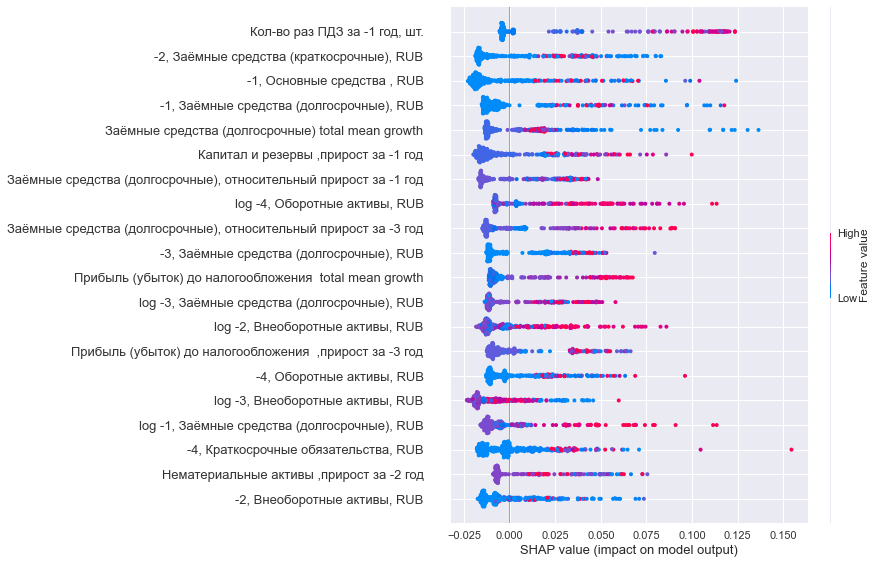

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7557
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C1BB6FA0> with treshold = 0.0...


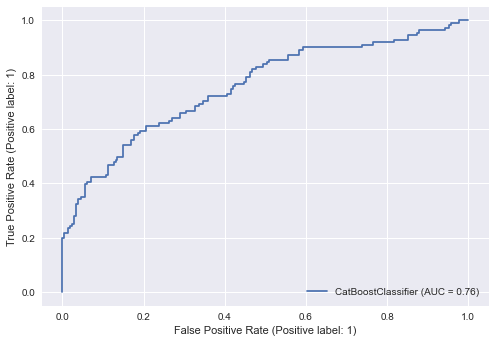

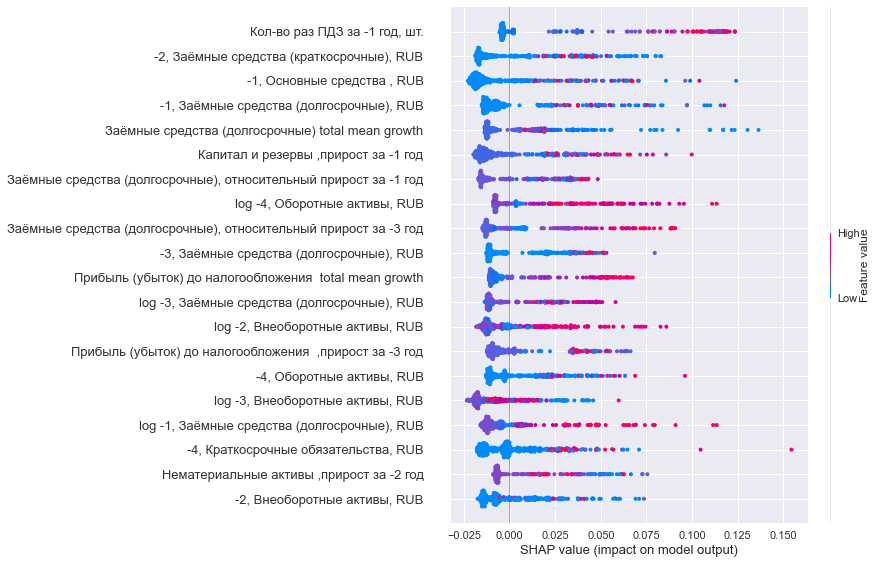

F1 = 0.6099, Precision = 0.6071, Recall = 0.6126, Accuracy = 0.7323, ROC_AUC = 0.7557
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2279670> with treshold = 0.5...


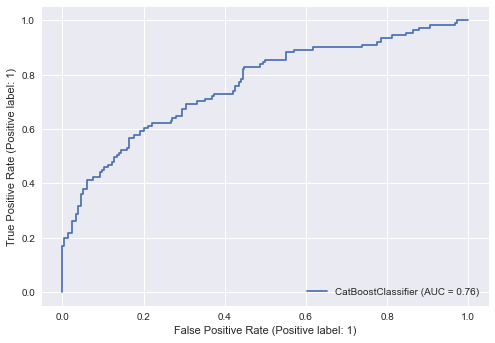

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


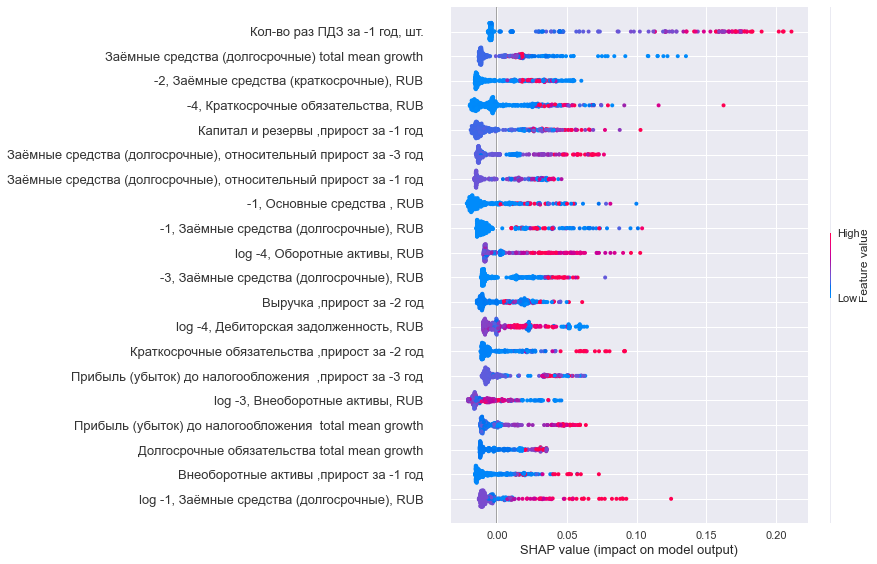

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7611
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2279670> with treshold = 0.0...


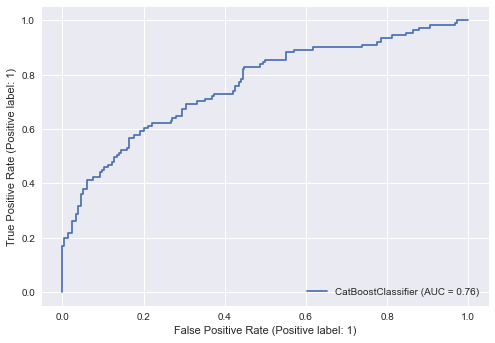

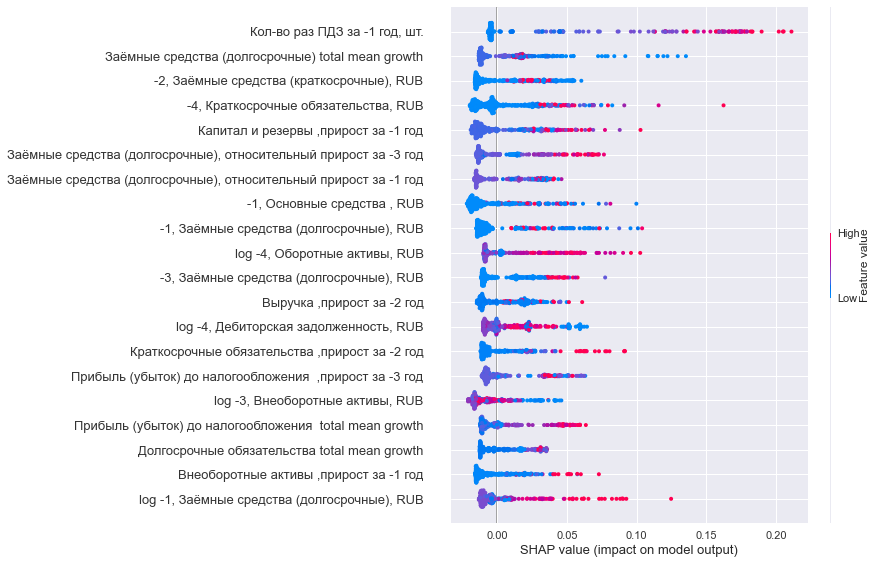

F1 = 0.6154, Precision = 0.4894, Recall = 0.8288, Accuracy = 0.6462, ROC_AUC = 0.7611
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2279610> with treshold = 0.5...


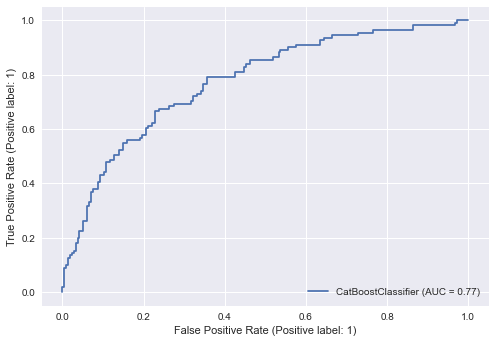

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


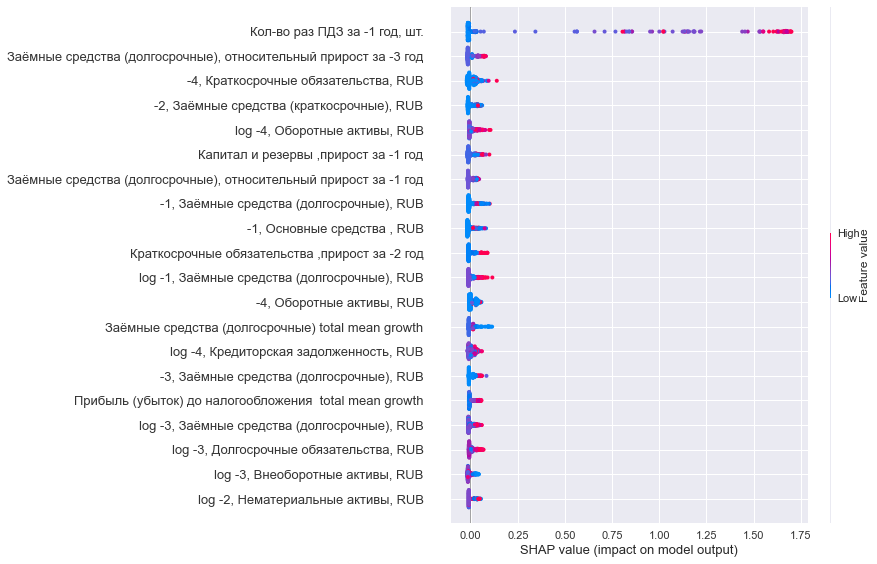

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7742
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2279610> with treshold = 0.0...


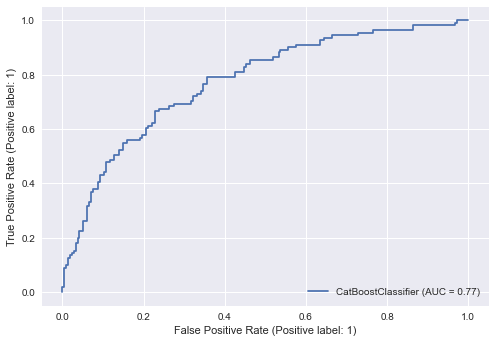

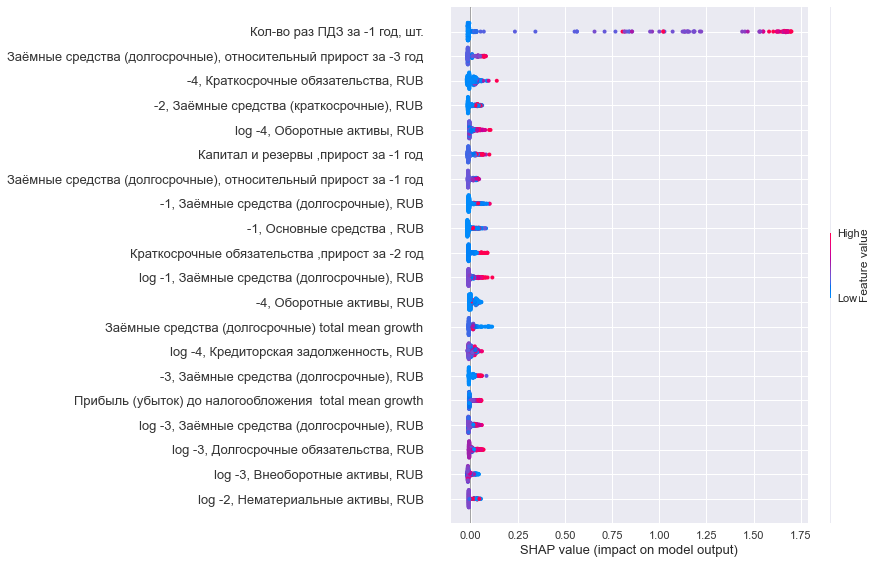

F1 = 0.64, Precision = 0.5366, Recall = 0.7928, Accuracy = 0.6954, ROC_AUC = 0.7742
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2C42700> with treshold = 0.5...


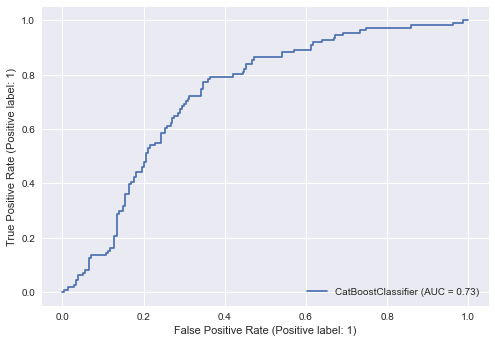

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


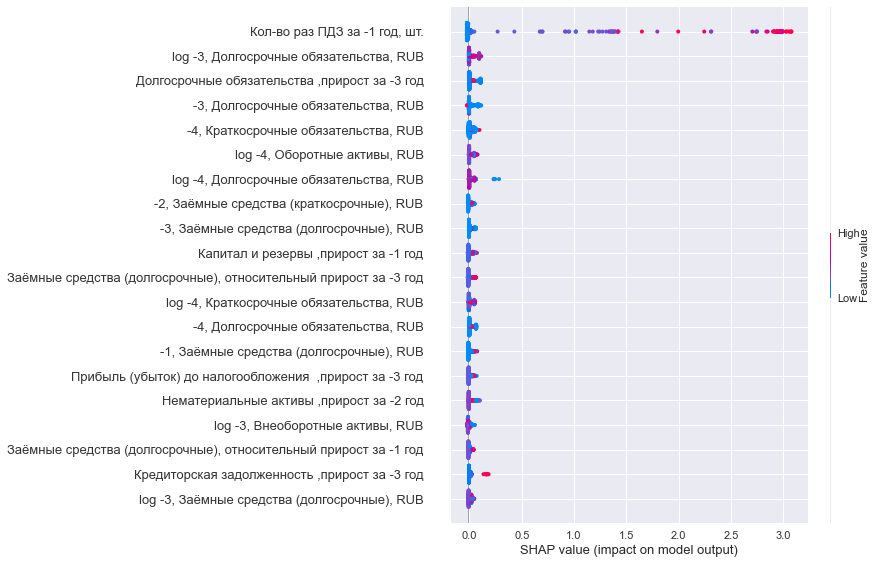

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7281
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2C42700> with treshold = 0.0...


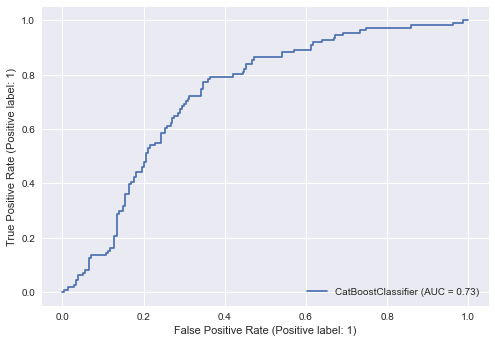

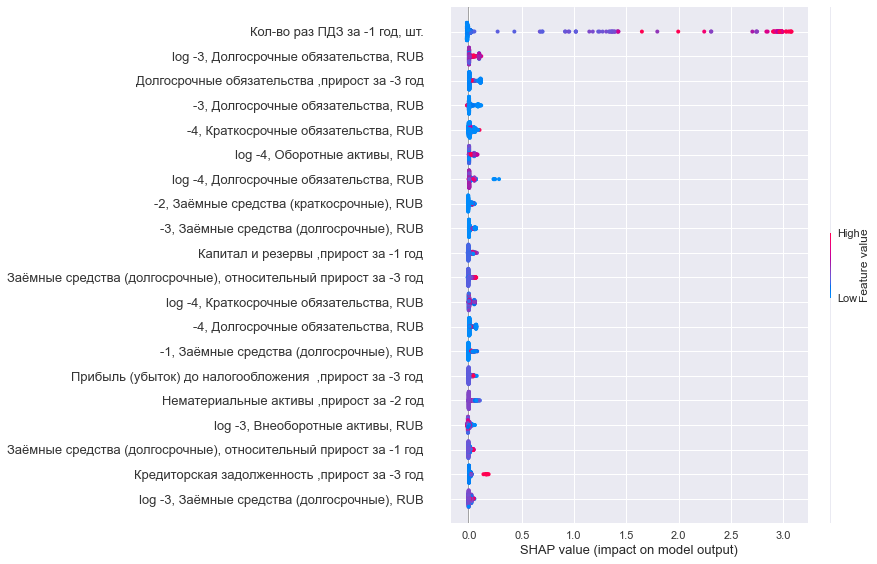

F1 = 0.6354, Precision = 0.5301, Recall = 0.7928, Accuracy = 0.6892, ROC_AUC = 0.7281
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C221E040> with treshold = 0.5...


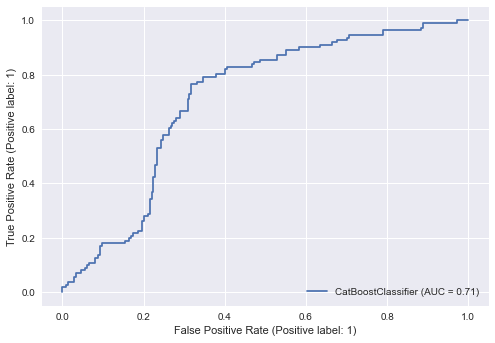

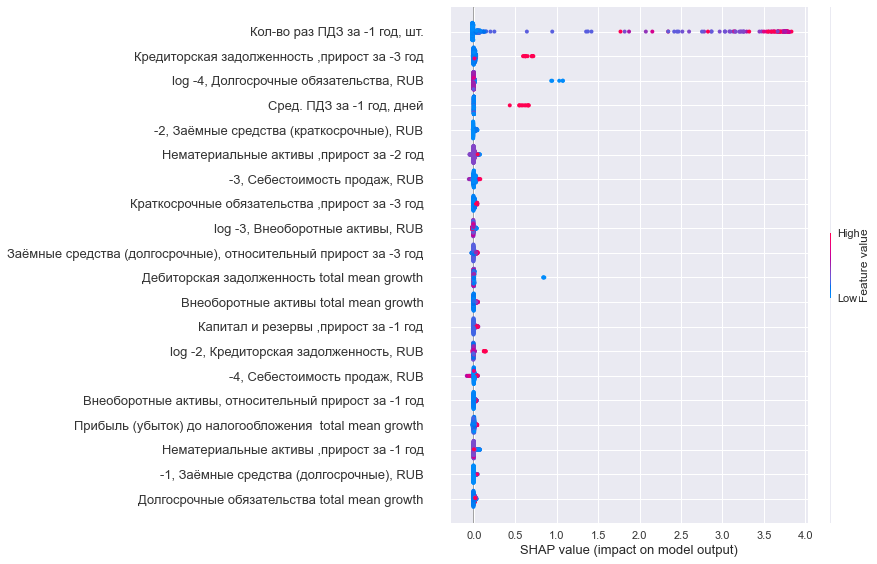

F1 = 0.0678, Precision = 0.5714, Recall = 0.036, Accuracy = 0.6615, ROC_AUC = 0.7099
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C221E040> with treshold = 0.02...


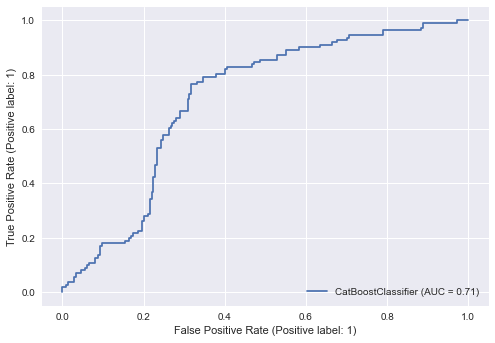

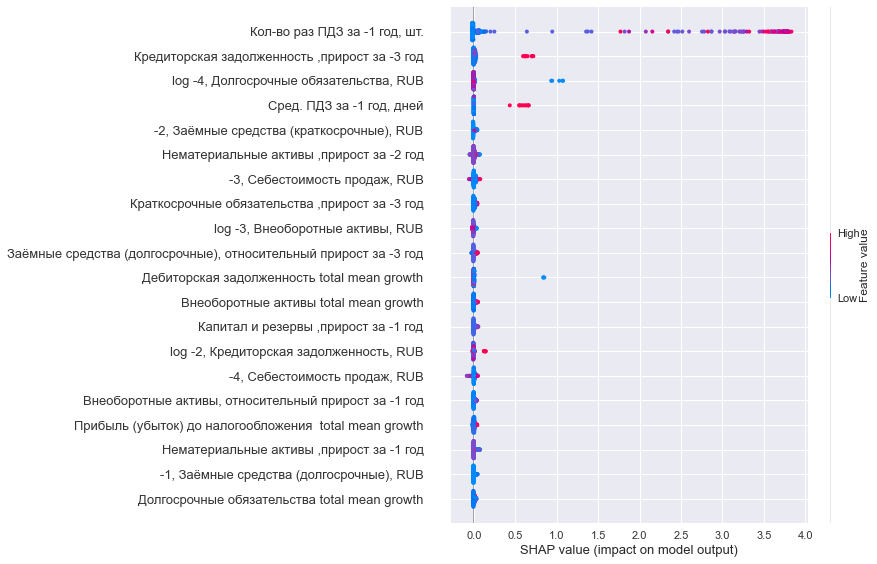

F1 = 0.6447, Precision = 0.5432, Recall = 0.7928, Accuracy = 0.7015, ROC_AUC = 0.7099
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C1C73670> with treshold = 0.5...


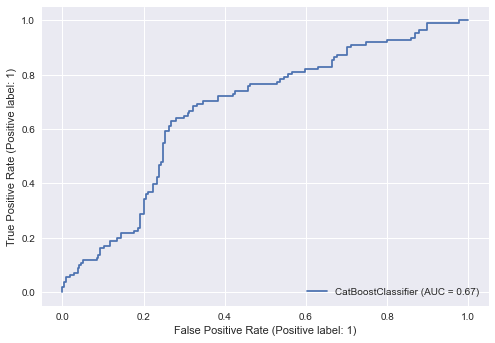

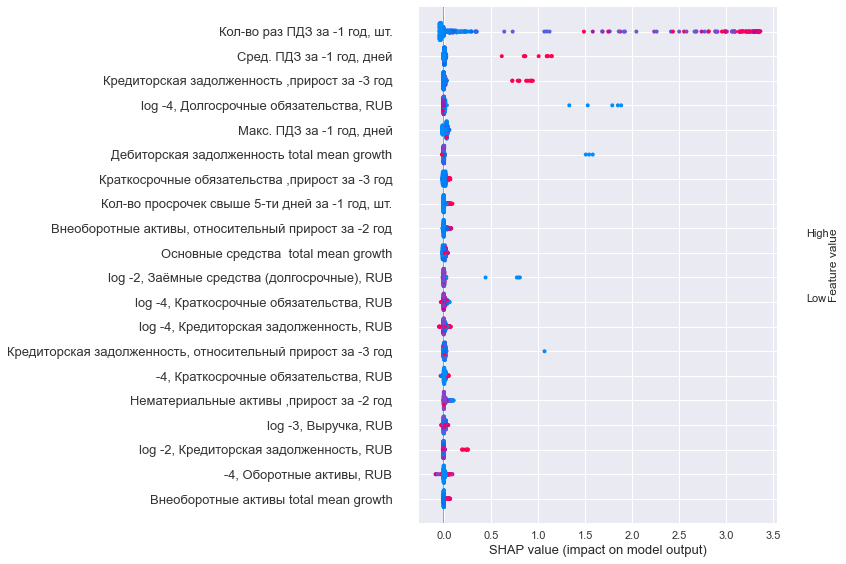

F1 = 0.3017, Precision = 0.3971, Recall = 0.2432, Accuracy = 0.6154, ROC_AUC = 0.6732
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C1C73670> with treshold = 0.08...


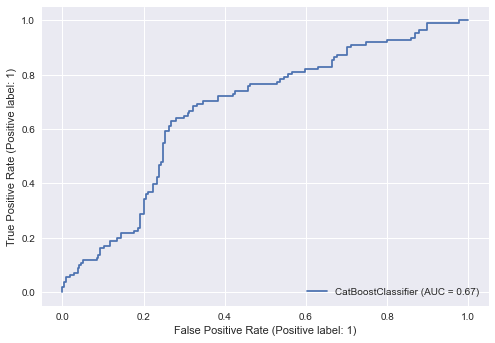

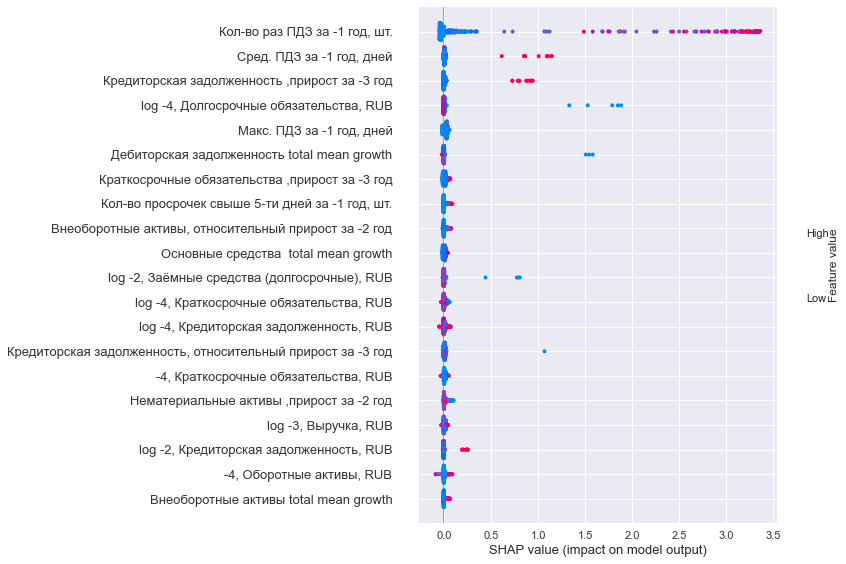

F1 = 0.5946, Precision = 0.5203, Recall = 0.6937, Accuracy = 0.6769, ROC_AUC = 0.6732
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C22A6850> with treshold = 0.5...


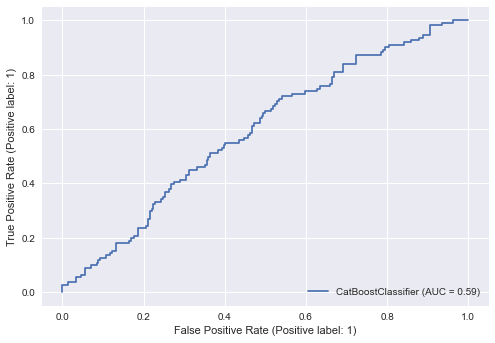

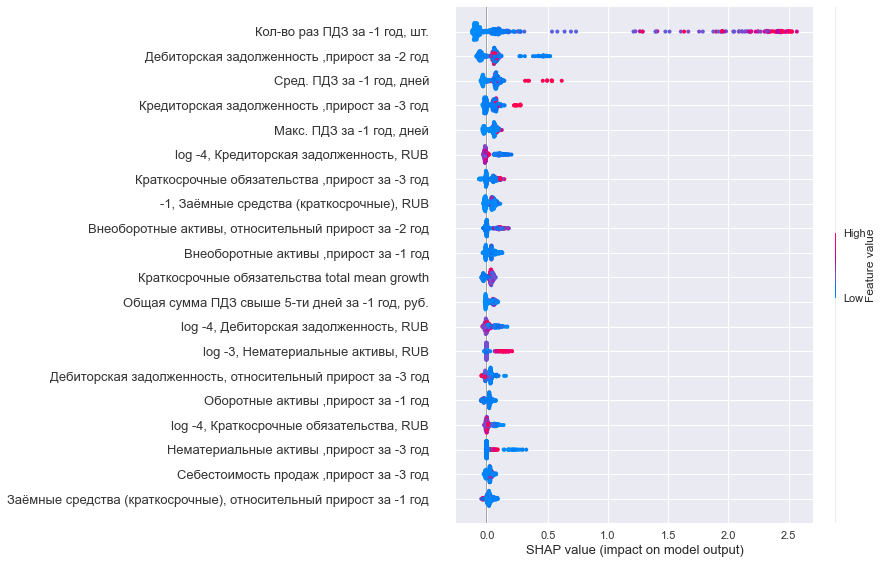

F1 = 0.4167, Precision = 0.4286, Recall = 0.4054, Accuracy = 0.6123, ROC_AUC = 0.5919
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C22A6850> with treshold = 0.22...


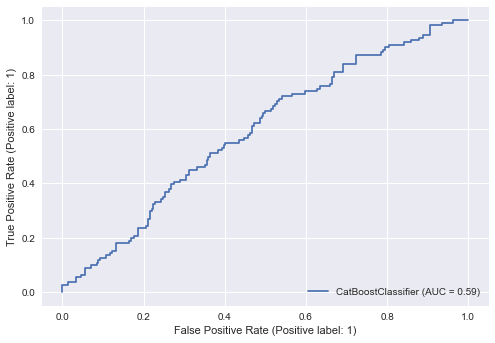

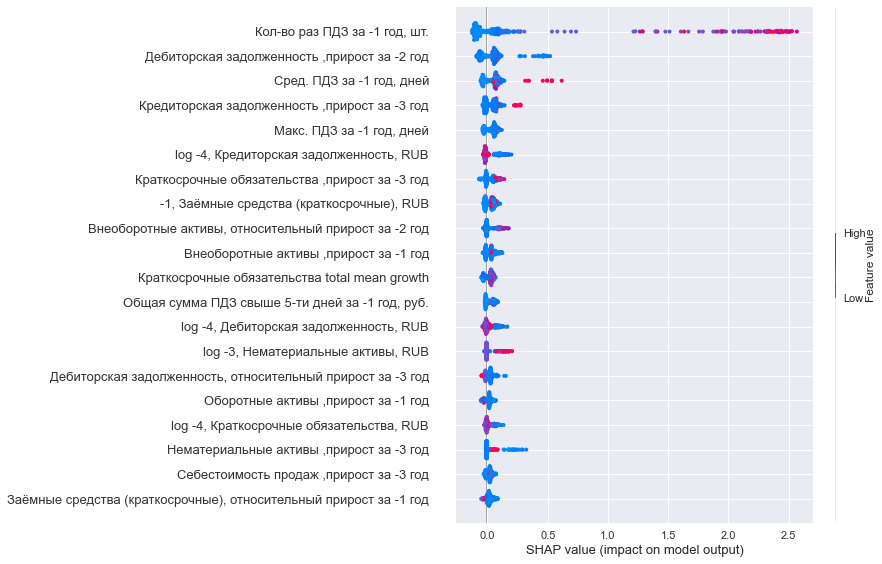

F1 = 0.5344, Precision = 0.3849, Recall = 0.8739, Accuracy = 0.48, ROC_AUC = 0.5919


In [91]:
# 1000 iters
# {'class_w': 0.14846074739222617, 'learning_rate': 0.0024817406509043795}
# {'class_w': 0.05147444902080074, 'learning_rate': 0.00697732595493729}

# 500 iters
# {'class_w': 0.02717153143772547, 'learning_rate': 0.0143344193095175}
# {'class_w': 0.002209808913483319, 'learning_rate': 0.33832420007751696}

for w in np.logspace(-6, -1, 10):
    model = CatBoostClassifier(iterations=500,
                               depth=5, 
                               l2_leaf_reg=5, 
                               learning_rate=0.0143344193095175,
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, w], # 0.00059948425
                               random_seed=RANDOM_STATE,
                              )

    make_report(model, df, #[[col for col in df.columns if 'log' in col or 'total mean growth' in col] + ness_cols], 
                treshold=0.5, to_file=False, file_path='../reports/report_petr.csv', 
                create_new_clients=False, comment=f'');

    X_train, X_test, y_train, y_test = data_split(df)
    probas = model.predict_proba(X_test)[:, 1]

    best = 0
    xx = 0
    for x in sorted(probas):
        pr = precision_score(y_test, probas >= x)
        rl = recall_score(y_test, probas >= x)
        best_ = f1_score(y_test, probas >= x)
        # best_ = pr * rl
        if best_ >= best:
            best = best_
            xx = x

    make_report(model, df,
                treshold=xx, to_file=True, file_path='../reports/report_petr.csv', 
                create_new_clients=False, comment=f'weight = {w}')

In [10]:
X_train, X_test, y_train, y_test = data_split(df)

def get_catboost_params(space):
    params = dict()
    params['learning_rate'] = space['learning_rate']
    params['class_w'] = space['class_w']
    
    # params['depth'] = int(space['depth'])
    # params['l2_leaf_reg'] = space['l2_leaf_reg']
    # params['iterations'] = int(space['iterations'])
    return params

obj_call_count = 0
cur_best_loss = np.inf
cur_best_score = 0

def objective(space):
    global obj_call_count, cur_best_score, cur_best_loss

    obj_call_count += 1

    print('\nCatBoost objective call #{} cur_best_score={:7.5f}'.format(obj_call_count, cur_best_score) )

    params = get_catboost_params(space)

    sorted_params = sorted(space.items(), key=lambda z: z[0])
    params_str = str.join(' ', ['{}={}'.format(k, v) for k, v in sorted_params])
    print('Params: {}'.format(params_str) )

    model = CatBoostClassifier(iterations=500, #params['iterations'],
                               depth=5, # params['depth'], 
                               l2_leaf_reg=5, #params['l2_leaf_reg'], 
                               learning_rate=params['learning_rate'],
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, params['class_w']],
                               random_seed=RANDOM_STATE,
                                )
    
    
    model, preds, probas = fit_predict(model, X_train, y_train, X_test, y_test, treshold=0.5, plot_roc_auc=False)
    f1, precision, recall, acc, roc_auc = make_scores(y_test, preds, probas=probas)
    test_loss = log_loss(y_test, preds, labels=[0, 1])

    nb_trees = model.tree_count_

    print('nb_trees={}'.format(nb_trees))
    
    if test_loss < cur_best_loss:
        cur_best_loss = test_loss
        cur_best_score = roc_auc
        print('\033[92m' + 'NEW BEST LOSS={}'.format(cur_best_loss) + '\033[0m')
        print('\033[92m' + 'NEW BEST ROC_AUC={}'.format(roc_auc) + '\033[0m')


    return {'loss':test_loss, 'status': STATUS_OK }

In [11]:
space = {
    # 'depth': hp.quniform("depth", 2, 6, 1),
    # 'iterations': hp.quniform('iterations', 200, 5000, 1),
    'learning_rate': hp.loguniform('learning_rate', -6, -1),
    # 'l2_leaf_reg': hp.uniform('l2_leaf_reg', 3, 8),
    'class_w': hp.uniform('class_w', 1e-4, 1e-1),
}

trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials,
    verbose=True
)

print('-'*50)
print('The best params:')
print( best )
print('\n\n')

                                                                                                                       
CatBoost objective call #1 cur_best_score=0.00000
Params: class_w=0.04130399554940804 learning_rate=0.17138997673867373                                                  
Fitting model <catboost.core.CatBoostClassifier object at 0x000001A87E5229A0> with treshold = 0.5...                   
nb_trees=500                                                                                                           
NEW BEST LOSS=16.685225349065675                                                                              
NEW BEST ROC_AUC=0.6301675507282984                                                                           
                                                                                                                       
CatBoost objective call #2 cur_best_score=0.63017
Params: class_w=0.034272886395091386 learning_rate=0.004774662897818994       

Fitting model <catboost.core.CatBoostClassifier object at 0x000001F41CE23970> with treshold = 0.6...


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

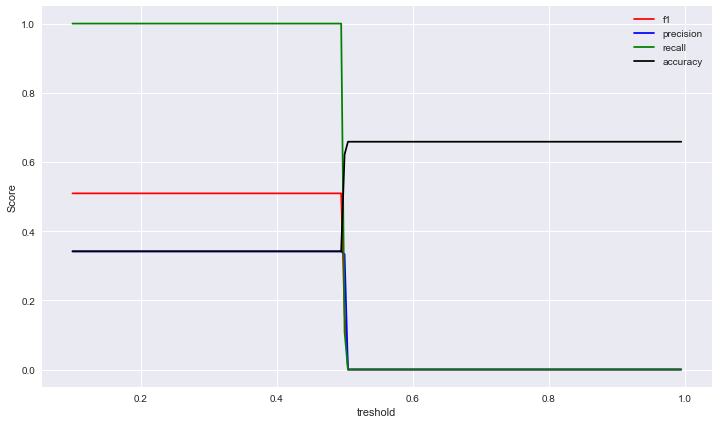

In [9]:
model = CatBoostClassifier(iterations=1000,
                           # depth=6.0, 
                           # l2_leaf_reg=4.17, 
                           learning_rate=1e-6,
                           loss_function='Logloss',
                           use_best_model=True,
                           eval_metric='F1',
                           verbose=False,
                           class_weights=[1, 1e-3],
                          )

#model = RandomForestClassifier(n_estimators=30)
validate_treshold(model, df)

In [25]:
X_train, X_test, y_train, y_test = data_split(df)

In [84]:
np.around(model.predict_proba(X_train)[:, 1][:100], 3)

array([0.001, 0.004, 0.004, 0.001, 0.003, 0.01 , 0.002, 0.001, 0.001,
       0.001, 0.002, 0.006, 0.001, 0.015, 0.009, 0.001, 0.   , 0.001,
       0.001, 0.014, 0.021, 0.001, 0.007, 0.004, 0.004, 0.001, 0.009,
       0.006, 0.009, 0.001, 0.001, 0.022, 0.034, 0.008, 0.001, 0.01 ,
       0.001, 0.001, 0.003, 0.002, 0.007, 0.005, 0.001, 0.015, 0.002,
       0.001, 0.001, 0.001, 0.009, 0.001, 0.001, 0.006, 0.001, 0.001,
       0.004, 0.001, 0.008, 0.003, 0.004, 0.001, 0.001, 0.011, 0.006,
       0.004, 0.002, 0.001, 0.009, 0.001, 0.002, 0.002, 0.001, 0.001,
       0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.001, 0.001,
       0.001, 0.004, 0.009, 0.003, 0.001, 0.003, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.002, 0.001, 0.001, 0.001, 0.001, 0.011,
       0.001])

In [85]:
probas = model.predict_proba(X_test)[:, 1]

In [86]:
np.around(probas[:100], 3)

array([0.007, 0.004, 0.006, 0.007, 0.007, 0.001, 0.001, 0.001, 0.001,
       0.003, 0.001, 0.001, 0.001, 0.001, 0.002, 0.004, 0.006, 0.001,
       0.012, 0.012, 0.01 , 0.001, 0.   , 0.005, 0.004, 0.003, 0.001,
       0.008, 0.001, 0.006, 0.007, 0.012, 0.001, 0.001, 0.015, 0.001,
       0.002, 0.027, 0.001, 0.006, 0.026, 0.002, 0.006, 0.009, 0.001,
       0.004, 0.004, 0.005, 0.007, 0.002, 0.001, 0.01 , 0.008, 0.003,
       0.002, 0.002, 0.001, 0.001, 0.001, 0.006, 0.002, 0.001, 0.001,
       0.007, 0.001, 0.001, 0.008, 0.006, 0.001, 0.002, 0.001, 0.023,
       0.002, 0.007, 0.001, 0.01 , 0.007, 0.002, 0.012, 0.002, 0.011,
       0.001, 0.008, 0.001, 0.001, 0.001, 0.002, 0.001, 0.001, 0.001,
       0.004, 0.001, 0.005, 0.001, 0.001, 0.001, 0.002, 0.001, 0.   ,
       0.002])